In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi

# 1. Avalanche df Preparation


Location of Zip file:
https://www.doi.org/10.16904/envidat.134

File used in zip file: data_set_1_avalanche_observations_wi9899_to_wi1819_davos.csv

In [2]:
#    CSV FIlE              UNIT                    DESCRIPTION

#    no                                            Avalanche number
#    date_release                                  Date of release
#    snow_type                                     Type of snow: "dry", "wet", "mixed", "unknown"
#    trigger_type                                  Type of trigger: "HUMAN", "NATURAL", "EXPLOSIVE", "UNKNOWN"
#    max_elevation_m       m                       Avalanche Maximum elevation - NOT USED
#    min_elevation_m       m                       Avalanche Minimum elevation - NOT USED
#    aspect_degrees        degree                  Avalanche Aspect - NOT USED
#    length_m              m                       Avalanche length - NOT USED
#    width_m               m                       Avalanche width - NOT USED
#    perimeter_length_m    m                       Avalanche perimeter - NOT USED
#    area_m2               m2                      Avalanche surface area
#    aval_size_class                               Avalanche size class (1 to 5) - NOT USED
#    weight_AAI                                    Avalanche activity index (AAI) - NOT USED
#    max.danger.corr                               Avalanche danger level on the day (1 to 5)

In [3]:
# import avalanche data
df_avalanche = pd.read_csv('../DataSet_Avalanche_Original_EnviDat/data_set_1_avalanche_observations_wi9899_to_wi1819_davos.csv', sep = ';')
df_avalanche

,no,date_release,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max.danger.corr
0,1,1998-11-06,dry,NATURAL,"2,476.0","2,439.0",4.0,63.0,33.0,168.0,"1,413.0",2,0.1,nan
1,2,1998-12-07,dry,NATURAL,"2,562.0","2,484.0",42.0,101.0,123.0,355.0,"8,762.0",2,0.1,3.0
2,3,1998-12-07,dry,NATURAL,"2,494.0","2,356.0",21.0,127.0,351.0,834.0,"30,522.0",3,1.0,3.0
3,4,1998-12-07,dry,HUMAN,"2,115.0","2,017.0",200.0,166.0,85.0,454.0,"7,837.0",2,0.1,3.0
4,5,1998-12-07,dry,NATURAL,"2,085.0","1,986.0",42.0,128.0,18.0,265.0,"1,522.0",2,0.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13913,13914,2019-04-24,wet,NATURAL,"2,554.0","2,551.0",138.0,52.0,6.0,107.0,215.0,2,0.1,3.0
13914,13915,2019-04-24,wet,NATURAL,"2,610.0","2,574.0",159.0,50.0,8.0,111.0,304.0,2,0.1,3.0
13915,13916,2019-05-07,dry,HUMAN,"2,589.0","2,567.0",307.0,36.0,14.0,82.0,340.0,1,0.0,2.0
13916,13917,2019-05-07,wet,HUMAN,"2,572.0","2,532.0",80.0,65.0,25.0,150.0,"1,044.0",2,0.1,2.0


In [4]:
# Rename column
df_avalanche.rename(columns = {'date_release':'Date', 'snow_type':'Snow_type', 'trigger_type':'Trigger_type', 'area_m2': 'Avalanche_size_m2', 'max.danger.corr':'Avalanche_danger_level'}, inplace = True) 

# Remove unused columns
df_avalanche.drop(columns = {'max_elevation_m', 'min_elevation_m', 'aspect_degrees', 'length_m', 'width_m', 'perimeter_length_m', 'aval_size_class', 'weight_AAI'}, inplace = True) 

# convert column Date to datetime format
df_avalanche['Date']= pd.to_datetime(df_avalanche['Date'])

# Remove NaN value
df_avalanche = df_avalanche.dropna()

In [5]:
dfi.export(df_avalanche.iloc[11141:11147], '../Tables/df_avalanche.png', max_rows= 7)
df_avalanche.iloc[11141:11147]

,no,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level
11394,11395,2017-03-10,wet,EXPLOSIVE,"7,022.0",4.0
11395,11396,2017-03-10,dry,EXPLOSIVE,"9,953.0",4.0
11396,11397,2017-03-10,dry,NATURAL,"3,306.0",4.0
11397,11398,2017-03-10,dry,EXPLOSIVE,"10,339.0",4.0
11398,11399,2017-03-10,dry,HUMAN,"3,925.0",4.0
11399,11400,2017-03-10,dry,NATURAL,"1,411.0",4.0


In [6]:
# One wrong date was recorded
# found because in Meteo df there was a big snow fall between 2005_12_16 and 2005_12_17, with more than 50cm new snow
# it is not possible that avalanche are happening only in the beginning of this snow fall
# correct the wrong date
df_avalanche = df_avalanche.replace(to_replace = '2005-12-16', value= '2005-12-17') 

In [7]:
df_avalanche[df_avalanche.Date == '2005-12-17']

,no,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level


In [8]:
# Set index = 'Date'
df_avalanche = df_avalanche.set_index('Date')
Start_date = df_avalanche.index[0]
End_date = df_avalanche.index[-1]
print('Davos Avalanche Record Timeframe:            ' + str(Start_date) + ' to ' + str(End_date))
print('Total number of avalanches recorded:         ' + str(df_avalanche.Snow_type.size))
print('Total number of "Dry Snow" avalanches :      ' + str(df_avalanche[df_avalanche['Snow_type'] == 'dry'].Snow_type.count()))
print('Total number of "Wet Snow" avalanches :      ' + str(df_avalanche[df_avalanche['Snow_type'] == 'wet'].Snow_type.count()))
print('Total number of "Mixed Snow" avalanches :    ' + str(df_avalanche[df_avalanche['Snow_type'] == 'mixed'].Snow_type.count()))
print('Total number of "Unknown Snow" avalanches :  ' + str(df_avalanche[df_avalanche['Snow_type'] == 'unknown'].Snow_type.count()))

Davos Avalanche Record Timeframe:            1998-12-07 00:00:00 to 2019-05-07 00:00:00
Total number of avalanches recorded:         13629
Total number of "Dry Snow" avalanches :      7673
Total number of "Wet Snow" avalanches :      4033
Total number of "Mixed Snow" avalanches :    869
Total number of "Unknown Snow" avalanches :  1054


In [9]:
# Rearrange the df, to that the number of each type of avalanche can be counted
df_avalanche['Num_wet'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'wet')
df_avalanche['Num_wet'] = df_avalanche['Num_wet'] == 'wet' 
df_avalanche['Num_wet'] = df_avalanche['Num_wet'].astype(int)

df_avalanche['Num_dry'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'dry')
df_avalanche['Num_dry'] = df_avalanche['Num_dry'] == 'dry' 
df_avalanche['Num_dry'] = df_avalanche['Num_dry'].astype(int)

df_avalanche['Num_mixed'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'mixed')
df_avalanche['Num_mixed'] = df_avalanche['Num_mixed'] == 'mixed' 
df_avalanche['Num_mixed'] = df_avalanche['Num_mixed'].astype(int)

df_avalanche['Num_unknown'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'unknown')
df_avalanche['Num_unknown'] = df_avalanche['Num_unknown'] == 'unknown' 
df_avalanche['Num_unknown'] = df_avalanche['Num_unknown'].astype(int)
df_avalanche['Num_Natural'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'NATURAL')
df_avalanche['Num_Natural'] = df_avalanche['Num_Natural'] == 'NATURAL' 
df_avalanche['Num_Natural'] = df_avalanche['Num_Natural'].astype(int)

df_avalanche['Num_Human'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'HUMAN')
df_avalanche['Num_Human'] = df_avalanche['Num_Human'] == 'HUMAN' 
df_avalanche['Num_Human'] = df_avalanche['Num_Human'].astype(int)

df_avalanche['Num_Explosive'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'EXPLOSIVE')
df_avalanche['Num_Explosive'] = df_avalanche['Num_Explosive'] == 'EXPLOSIVE' 
df_avalanche['Num_Explosive'] = df_avalanche['Num_Explosive'].astype(int)

df_avalanche['Num_Unknown_t'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'UNKNOWN')
df_avalanche['Num_Unknown_t'] = df_avalanche['Num_Unknown_t'] == 'UNKNOWN' 
df_avalanche['Num_Unknown_t'] = df_avalanche['Num_Unknown_t'].astype(int)
df_avalanche = df_avalanche.reset_index()
df_avalanche

,Date,no,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level,Num_wet,Num_dry,Num_mixed,Num_unknown,Num_Natural,Num_Human,Num_Explosive,Num_Unknown_t
0,1998-12-07,2,dry,NATURAL,"8,762.0",3.0,0,1,0,0,1,0,0,0
1,1998-12-07,3,dry,NATURAL,"30,522.0",3.0,0,1,0,0,1,0,0,0
2,1998-12-07,4,dry,HUMAN,"7,837.0",3.0,0,1,0,0,0,1,0,0
3,1998-12-07,5,dry,NATURAL,"1,522.0",3.0,0,1,0,0,1,0,0,0
4,1998-12-07,6,dry,NATURAL,"5,929.0",3.0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13624,2019-04-23,13913,wet,NATURAL,970.0,2.0,1,0,0,0,1,0,0,0
13625,2019-04-24,13914,wet,NATURAL,215.0,3.0,1,0,0,0,1,0,0,0
13626,2019-04-24,13915,wet,NATURAL,304.0,3.0,1,0,0,0,1,0,0,0
13627,2019-05-07,13916,dry,HUMAN,340.0,2.0,0,1,0,0,0,1,0,0


In [10]:
# Write df_avalanche data to csv file
df_avalanche.to_csv('../Processed_DataSets/Avalanches.csv', index = False)

In [11]:
df_avalanche

,Date,no,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level,Num_wet,Num_dry,Num_mixed,Num_unknown,Num_Natural,Num_Human,Num_Explosive,Num_Unknown_t
0,1998-12-07,2,dry,NATURAL,"8,762.0",3.0,0,1,0,0,1,0,0,0
1,1998-12-07,3,dry,NATURAL,"30,522.0",3.0,0,1,0,0,1,0,0,0
2,1998-12-07,4,dry,HUMAN,"7,837.0",3.0,0,1,0,0,0,1,0,0
3,1998-12-07,5,dry,NATURAL,"1,522.0",3.0,0,1,0,0,1,0,0,0
4,1998-12-07,6,dry,NATURAL,"5,929.0",3.0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13624,2019-04-23,13913,wet,NATURAL,970.0,2.0,1,0,0,0,1,0,0,0
13625,2019-04-24,13914,wet,NATURAL,215.0,3.0,1,0,0,0,1,0,0,0
13626,2019-04-24,13915,wet,NATURAL,304.0,3.0,1,0,0,0,1,0,0,0
13627,2019-05-07,13916,dry,HUMAN,340.0,2.0,0,1,0,0,0,1,0,0


In [12]:
#    DF_AVALANCHE          UNIT                    DESCRIPTION

#    Date                                          Date of release
#    no                                            Avalanche number (NOT USED)
#    Snow_type                                     Type of snow: "dry", "wet", "mixed", "unknown"
#    Trigger_type                                  Type of trigger: "HUMAN", "NATURAL", "EXPLOSIVE", "UNKNOWN"
#    Avalanche_size_m2     m2                      Avalanche area
#    Avalanche_danger_level                          Avalanche danger level on the day (1 to 5)             
#    Num_wet                                       Count of "wet" type avalanches
#    Num_dry                                       Count of "dry" type avalanches
#    Num_mixed                                     Count of "mixed" type avalanches
#    Num_unknown                                   Count of "unknwown" type avalanches
#    Num_Natural                                   Count of "NATURAL" triggered avalanches
#    Num_Human                                     Count of "HUMAN" triggered avalanches
#    Num_explosive                                 Count of "EXPLOSIVE" triggered avalanches
#    Num_unknown_t                                 Count of "UNKNOWN" triggered avalanches

## 1.1 Avalanche - statistic plots

### 1.1.1 Histogram - Box plot of avalanche size

In [13]:
df = df_avalanche.copy()
df = df.groupby(['no','Avalanche_danger_level','Snow_type','Trigger_type']).agg({'Avalanche_size_m2':'mean',
                                                                               'Num_wet':'sum', 'Num_dry':'sum',
                                                                               'Num_mixed': 'sum', 'Num_unknown': 'sum',
                                                                               'Num_Natural':'sum', 'Num_Human': 'sum',
                                                                               'Num_Explosive':'sum', 'Num_Unknown_t':'sum'})

Statistic about "dry" avalanches size

In [14]:
df.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2.describe()

count       7,673.0
mean       17,584.6
std        45,038.9
min           145.0
25%         2,799.0
50%         6,172.0
75%        14,708.0
max     1,034,212.0
Name: Avalanche_size_m2, dtype: float64

Statistic about "wet" avalanches size

In [15]:
df.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2.describe()

count     4,033.0
mean     12,367.7
std      31,035.2
min         102.0
25%       2,188.0
50%       4,611.0
75%      10,526.0
max     689,478.0
Name: Avalanche_size_m2, dtype: float64

box plot - Avalanche size

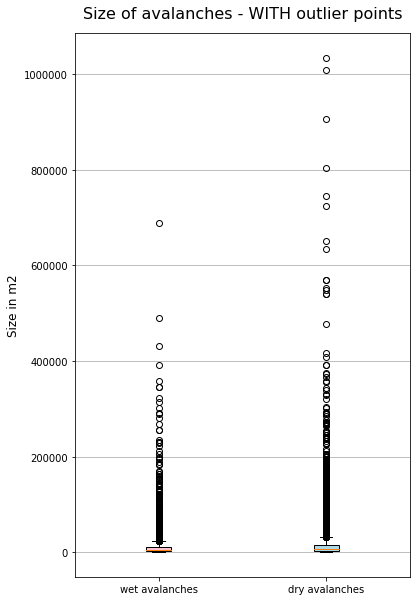

In [16]:
fig, ax1 = plt.subplots(figsize=(6, 10))
labels = ['wet avalanches', 'dry avalanches']

# rectangular box plot
bplot1 = ax1.boxplot([df.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2,
                      df.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2],
                     showfliers=True, vert=True, patch_artist=True, labels=labels)
ax1.set_title('Size of avalanches - WITH outlier points', fontdict={'fontsize':16}, pad = 15)

# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_ylabel('Size in m2',fontdict={'fontsize':12})
    
plt.show()

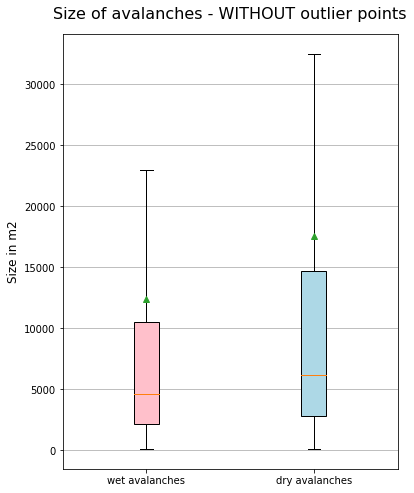

In [17]:
fig, ax2 = plt.subplots(figsize=(6, 8))
labels = ['wet avalanches', 'dry avalanches']
# rectangular box plot
bplot1 = ax2.boxplot([df.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2,
                      df.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2],
                     showmeans=True, showfliers=False, vert=True, patch_artist=True, labels=labels)
ax2.set_title('Size of avalanches - WITHOUT outlier points', fontdict={'fontsize':16}, pad = 15)
# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
# adding horizontal grid lines
ax2.yaxis.grid(True)
ax2.set_ylabel('Size in m2',fontdict={'fontsize':12})
plt.savefig('../Plots/Avalanche_size_hist.jpg')
plt.show()

Histogram avalanche size

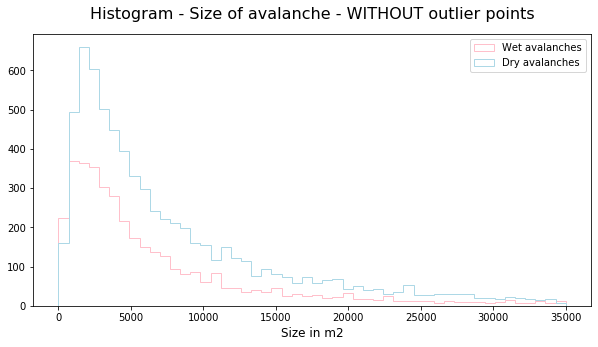

In [18]:
fig, ax3 = plt.subplots(figsize=(10, 5))
ax3.hist(df.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2, bins=50, color = 'pink',
         range=(0,35000), fill=False, histtype='step', label='Wet avalanches')
ax3.hist(df.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2, bins=50, color = 'lightblue',
         range=(0,35000), fill=False, histtype='step', label='Dry avalanches')

ax3.set_title('Histogram - Size of avalanche - WITHOUT outlier points', fontdict={'fontsize':16}, pad = 15)
ax3.set_xlabel('Size in m2',fontdict={'fontsize':12})
ax3.legend()

In [19]:
df_Level = df_avalanche.groupby(['Avalanche_danger_level','Date']).agg({'Avalanche_size_m2':'mean', 'Num_wet':'sum', 'Num_dry':'sum', 'Num_mixed': 'sum', 'Num_unknown': 'sum','Num_Natural':'sum', 'Num_Human': 'sum','Num_Explosive':'sum', 'Num_Unknown_t':'sum'}).copy()

In [20]:
df_avalanche = df_avalanche[df_avalanche['Num_Natural']>0]
df_avalanche = df_avalanche.groupby(['Avalanche_danger_level', 'Snow_type', 'Date']).agg({'Avalanche_size_m2':'mean',
                                                                                        'Num_wet':'sum', 'Num_dry':'sum',
                                                                                        'Num_mixed': 'sum',
                                                                                        'Num_unknown': 'sum',
                                                                                        'Num_Natural':'sum',
                                                                                        'Num_Human': 'sum',
                                                                                        'Num_Explosive':'sum',
                                                                                        'Num_Unknown_t':'sum'})
df_avalanche

Avalanche_size_m2  Num_wet  \
Avalanche_danger_level Snow_type Date                                     
1.0                    dry       2002-12-14            2,814.0        0   
                                 2007-12-24            4,141.0        0   
                                 2008-02-21            1,950.0        0   
                                 2013-12-17            7,666.0        0   
                                 2015-12-09            1,154.0        0   
...                                                        ...      ...   
5.0                    dry       2018-01-05           20,491.0        0   
                                 2018-01-22            4,595.7        0   
                                 2019-01-14            4,842.0        0   
                       unknown   1999-02-22            5,332.0        0   
                                 1999-02-23            3,880.7        0   

                                             Num_dry  Num_mixed  Num_unknown  \
Avalanche_danger_level Snow_type Date                                          
1.0                    dry       2002-12-14        1          0            0   
                                 2007-12-24        2          0            0   
                                 2008-02-21        1          0            0   
                                 2013-12-17        1          0            0   
                                 2015-12-09        1          0            0   
...                                              ...        ...          ...   
5.0                    dry       2018-01-05        1          0            0   
                                 2018-01-22       86          0            0   
                                 2019-01-14       34          0            0   
                       unknown   1999-02-22        0          0            2   
                                 1999-02-23        0          0            3   

                                             Num_Natural  Num_Human  \
Avalanche_danger_level Snow_type Date                                 
1.0                    dry       2002-12-14            1          0   
                                 2007-12-24            2          0   
                                 2008-02-21            1          0   
                                 2013-12-17            1          0   
                                 2015-12-09            1          0   
...                                                  ...        ...   
5.0                    dry       2018-01-05            1          0   
                                 2018-01-22           86          0   
                                 2019-01-14           34          0   
                       unknown   1999-02-22            2          0   
                                 1999-02-23            3          0   

                                             Num_Explosive  Num_Unknown_t  
Avalanche_danger_level Snow_type Date                                      
1.0                    dry       2002-12-14              0              0  
                                 2007-12-24              0              0  
                                 2008-02-21              0              0  
                                 2013-12-17              0              0  
                                 2015-12-09              0              0  
...                                                    ...            ...  
5.0                    dry       2018-01-05              0              0  
                                 2018-01-22              0              0  
                                 2019-01-14              0              0  
                       unknown   1999-02-22              0              0  
                                 1999-02-23              0              0  

[1092 rows x 9 columns]

In [21]:
NumDays5 = df_avalanche.xs((5, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).index.size
NumDays4 = df_avalanche.xs((4, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).index.size
NumDays3 = df_avalanche.xs((3, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).index.size
NumDays2 = df_avalanche.xs((2, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).index.size
NumDays1 = df_avalanche.xs((1, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).index.size
NumDaysTotal = NumDays1 + NumDays2 + NumDays3 + NumDays4 + NumDays5
print('Total number of days with "dry" avalanches recorded:  ' + str(NumDaysTotal))
print('Number of days with risk "5" :                        ' + str(NumDays5))
print('Number of days with risk "4" :                        ' + str(NumDays4))
print('Number of days with risk "3" :                        ' + str(NumDays3))
print('Number of days with risk "2" :                        ' + str(NumDays2))
print('Number of days with risk "1" :                        ' + str(NumDays1))

Total number of days with "dry" avalanches recorded:  489
Number of days with risk "5" :                        5
Number of days with risk "4" :                        57
Number of days with risk "3" :                        303
Number of days with risk "2" :                        118
Number of days with risk "1" :                        6


In [22]:
# General settings plotting
Title_size = {'fontsize': 20, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 16}
OffsetAxes = 15
OffsetTitle = 30
FigWidth = 8
FigHeigth = 5
plt.style.use('..\..\..\.matplotlib\stylelib\scientific.mplstyle')

#Function to write the y value above the plot
def autolabel(rects): 
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

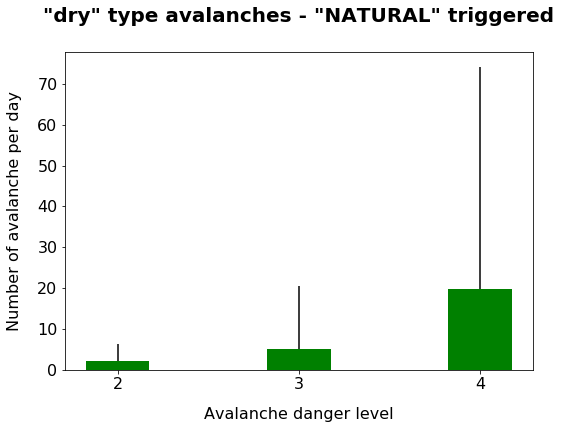

In [23]:

N2 = df_avalanche.xs((2, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.sum()
N3 = df_avalanche.xs((3, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.sum()
N4 = df_avalanche.xs((4, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.sum()

y2 = df_avalanche.xs((2, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.mean() + df_avalanche.xs((2, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.std()
y3 = df_avalanche.xs((3, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.mean() + df_avalanche.xs((3, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.std()
y4 = df_avalanche.xs((4, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.mean() + df_avalanche.xs((4, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural.std()

Y_err = [[0,0,0], [y2, y3, y4]]

# Define the label and the x an y value
labels = ['2', '3', '4']
V1_counts = [N2/NumDays2, N3/NumDays3, N4/NumDays4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, V1_counts, width, yerr = Y_err, color = 'g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number of avalanche per day',fontdict = Legend_size, labelpad = OffsetAxes)
#ax.set_ylim(top= 7000)
ax.set_title('"dry" type avalanches - "NATURAL" triggered',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
fig.tight_layout()
fig.set_figwidth(FigWidth*1.5)
fig.set_figheight(FigHeigth*1.5)
plt.savefig('../Plots/Num_of_avalanches.png')
plt.show()

Text(0.5, 1.0, 'Histogram - "dry" type avalanches, "NATURAL" triggered')

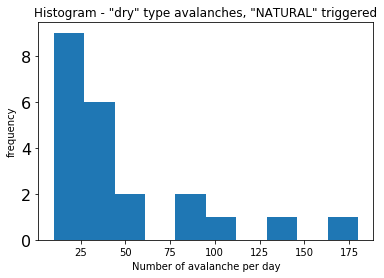

In [24]:
fig, ax = plt.subplots()
plt.hist(df_avalanche.xs((4, 'dry'), level=['Avalanche_danger_level', 'Snow_type']).Num_Natural, range = (10,180))
ax.set_xlabel('Number of avalanche per day')
ax.set_ylabel('frequency')
ax.set_title('Histogram - "dry" type avalanches, "NATURAL" triggered')

### 1.1.2 Statistic information about avalanches per danger level

In [25]:
df_Level

Avalanche_size_m2  Num_wet  Num_dry  \
Avalanche_danger_level Date                                              
1.0                    1999-04-04           14,675.5        2        0   
                       1999-04-28              610.0        1        0   
                       2002-04-05           12,070.0        0        0   
                       2002-04-06            3,243.0        1        0   
                       2002-12-14            2,814.0        0        1   
...                                              ...      ...      ...   
5.0                    2018-01-05           20,491.0        0        1   
                       2018-01-22            6,344.8        0      102   
                       2018-01-23           18,813.5        0        2   
                       2019-01-14            9,681.0        0       51   
                       2019-01-15           77,345.0        0        1   

                                   Num_mixed  Num_unknown  Num_Natural  \
Avalanche_danger_level Date                                              
1.0                    1999-04-04          0            0            2   
                       1999-04-28          0            0            1   
                       2002-04-05          0            1            1   
                       2002-04-06          0            0            1   
                       2002-12-14          0            0            1   
...                                      ...          ...          ...   
5.0                    2018-01-05          0            0            1   
                       2018-01-22          0            0           86   
                       2018-01-23          0            0            0   
                       2019-01-14          0            0           34   
                       2019-01-15          0            0            0   

                                   Num_Human  Num_Explosive  Num_Unknown_t  
Avalanche_danger_level Date                                                 
1.0                    1999-04-04          0              0              0  
                       1999-04-28          0              0              0  
                       2002-04-05          0              0              0  
                       2002-04-06          0              0              0  
                       2002-12-14          0              0              0  
...                                      ...            ...            ...  
5.0                    2018-01-05          0              0              0  
                       2018-01-22          0             14              2  
                       2018-01-23          0              2              0  
                       2019-01-14          0             15              2  
                       2019-01-15          0              1              0  

[1325 rows x 9 columns]

### 1.1.2 Total Number of avalanches by trigger type

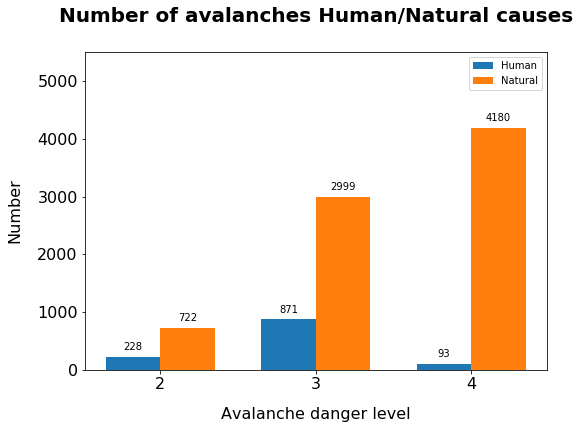

In [26]:
# Define the variables for that plot
V1='Human'
V2='Natural'

V1_1=df_Level.xs(1).Num_Human.sum()
V1_2=df_Level.xs(2).Num_Human.sum()
V1_3=df_Level.xs(3).Num_Human.sum()
V1_4=df_Level.xs(4).Num_Human.sum()
V1_5=df_Level.xs(5).Num_Human.sum()

V2_1=df_Level.xs(1).Num_Natural.sum()
V2_2=df_Level.xs(2).Num_Natural.sum()
V2_3=df_Level.xs(3).Num_Natural.sum()
V2_4=df_Level.xs(4).Num_Natural.sum()
V2_5=df_Level.xs(5).Num_Natural.sum()


# Define the label and the x an y value
labels = ['2', '3', '4']
V1_counts = [V1_2, V1_3, V1_4]
V2_counts = [V2_2, V2_3, V2_4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, V1_counts, width, label=str(V1))
rects2 = ax.bar(x + width/2, V2_counts, width, label=str(V2))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number',fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylim(top= 5500)
ax.set_title('Number of avalanches Human/Natural causes',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.set_figwidth(FigWidth*1.5)
fig.set_figheight(FigHeigth*1.5)
plt.savefig('../Plots/Num_of_avlanches_HUMAN-NATURAL.png')
plt.show()

### 1.1.3 Total Number of avalanches by years

In [27]:
df_Level_Years = df_Level.reset_index()
df_Level_Years = df_Level_Years.set_index('Date')
del df_Level_Years['Num_mixed']
del df_Level_Years['Num_unknown']
del df_Level_Years['Num_Explosive']
del df_Level_Years['Num_Unknown_t']
df_Level_Years = df_Level_Years.resample('1Y').agg({'Avalanche_size_m2':'mean', 'Num_Natural':'sum', 'Num_Human': 'sum', 'Avalanche_danger_level':'count'})

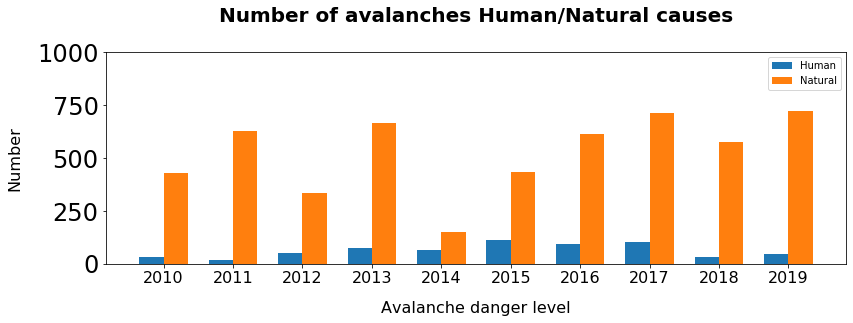

In [28]:
# General variable plotting
Title_size = {'fontsize': 20, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 16}
OffsetAxes = 15
OffsetTitle = 30
FigWidth = 20
FigHeigth = 5
plt.style.use('..\..\..\.matplotlib\stylelib\scientific2.mplstyle')

# Define the variables for that plot
V1='Human'
V2='Natural'

# Define the label and the x an y value
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_Level_Years.Num_Human.iloc[-10:], width, label=str(V1))
rects2 = ax.bar(x + width/2, df_Level_Years.Num_Natural.iloc[-10:], width, label=str(V2))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number',fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylim(top= 1000)
ax.set_title('Number of avalanches Human/Natural causes',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
ax.legend()
#autolabel(rects1)
#autolabel(rects2)
fig.tight_layout()
fig.set_figwidth(FigWidth)
fig.set_figheight(FigHeigth)
#plt.savefig('./Plots/Num_of_avlanches_HUMAN-NATURAL.png')
plt.show()

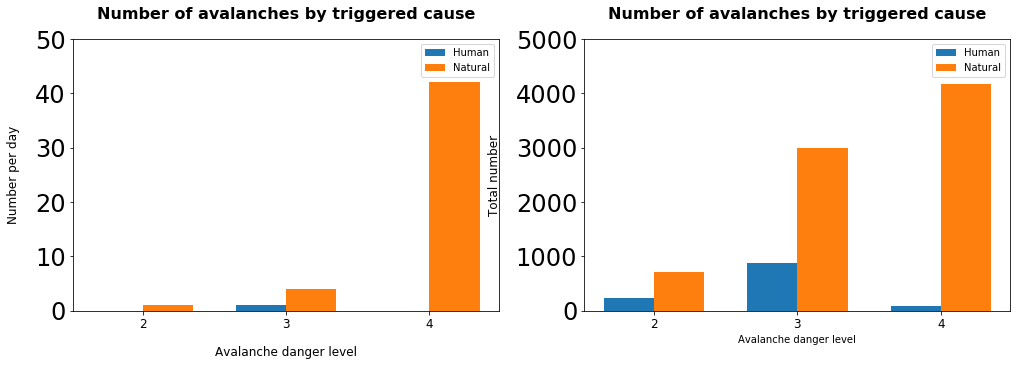

In [29]:
# General variable plotting
Title_size = {'fontsize': 16, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 12}
OffsetAxes = 15
OffsetTitle = 20
FigWidth = 8
FigHeigth = 5

# Define the variables for that plot
V1='Human'
V2='Natural'
V3='Human'
V4='Natural'

V1_2=df_Level.xs(2).Num_Human.sum()/df_Level.xs(2).Num_Human.count()
V1_3=df_Level.xs(3).Num_Human.sum()/df_Level.xs(3).Num_Human.count()
V1_4=df_Level.xs(4).Num_Human.sum()/df_Level.xs(4).Num_Human.count()

V2_2=df_Level.xs(2).Num_Natural.sum()/df_Level.xs(2).Num_Natural.count()
V2_3=df_Level.xs(3).Num_Natural.sum()/df_Level.xs(3).Num_Natural.count()
V2_4=df_Level.xs(4).Num_Natural.sum()/df_Level.xs(4).Num_Natural.count()

V3_2=df_Level.xs(2).Num_Human.sum()
V3_3=df_Level.xs(3).Num_Human.sum()
V3_4=df_Level.xs(4).Num_Human.sum()

V4_2=df_Level.xs(2).Num_Natural.sum()
V4_3=df_Level.xs(3).Num_Natural.sum()
V4_4=df_Level.xs(4).Num_Natural.sum()


# Define the label and the x an y value
labels = ['2', '3', '4']
V1_counts = [int(V1_2), int(V1_3), int(V1_4)]
V2_counts = [int(V2_2), int(V2_3), int(V2_4)]
V3_counts = [int(V3_2), int(V3_3), int(V3_4)]
V4_counts = [int(V4_2), int(V4_3), int(V4_4)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2)
rects1 = ax[0].bar(x - width/2, V1_counts, width, label=str(V1))
rects2 = ax[0].bar(x + width/2, V2_counts, width, label=str(V2))
rects3 = ax[1].bar(x - width/2, V3_counts, width, label=str(V3))
rects4 = ax[1].bar(x + width/2, V4_counts, width, label=str(V4))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax[0].set_ylabel('Number per day', fontdict = Legend_size, labelpad = OffsetAxes)
ax[0].set_ylim(top= 50)
ax[0].set_title('Number of avalanches by triggered cause',fontdict = Title_size, pad = OffsetTitle)
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, fontdict = Legend_size)
ax[0].legend()

ax[1].set_xlabel('Avalanche danger level')
ax[1].set_ylabel('Total number', fontdict = Legend_size, labelpad = OffsetAxes)
ax[1].set_ylim(top=5000)
ax[1].set_title('Number of avalanches by triggered cause',fontdict = Title_size, pad = OffsetTitle)
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, fontdict = Legend_size)
ax[1].legend()

fig.tight_layout
fig.set_figwidth(FigWidth*2.1)
fig.set_figheight(FigHeigth)
plt.show()

Number of avalanches per day

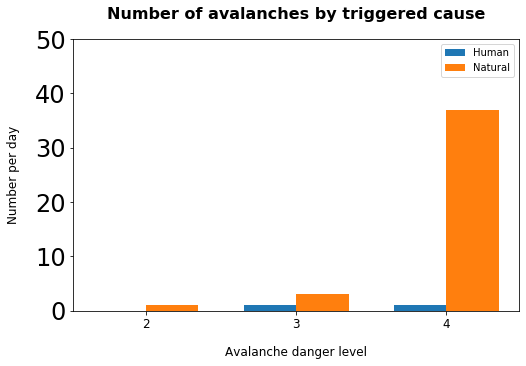

In [30]:
# General variable plotting
Title_size = {'fontsize': 16, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 12}
OffsetAxes = 15
OffsetTitle = 20
FigWidth = 8
FigHeigth = 5

# Define the variables for that plot
V1='Human'
V2='Natural'
V3='Human'
V4='Natural'

V1_2=df_Level[df_Level['Num_dry']>0].xs(2).Num_Human.sum()/df_Level[df_Level['Num_dry']>0].xs(2).Num_Human.count()
V1_3=df_Level[df_Level['Num_dry']>0].xs(3).Num_Human.sum()/df_Level[df_Level['Num_dry']>0].xs(3).Num_Human.count()
V1_4=df_Level[df_Level['Num_dry']>0].xs(4).Num_Human.sum()/df_Level[df_Level['Num_dry']>0].xs(4).Num_Human.count()

V2_2=df_Level[df_Level['Num_dry']>0].xs(2).Num_Natural.sum()/df_Level[df_Level['Num_dry']>0].xs(2).Num_Natural.count()
V2_3=df_Level[df_Level['Num_dry']>0].xs(3).Num_Natural.sum()/df_Level[df_Level['Num_dry']>0].xs(3).Num_Natural.count()
V2_4=df_Level[df_Level['Num_dry']>0].xs(4).Num_Natural.sum()/df_Level[df_Level['Num_dry']>0].xs(4).Num_Natural.count()



# Define the label and the x an y value
labels = ['2', '3', '4']
V1_counts = [int(V1_2), int(V1_3), int(V1_4)]
V2_counts = [int(V2_2), int(V2_3), int(V2_4)]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,1)
rects1 = ax.bar(x - width/2, V1_counts, width, label=str(V1))
rects2 = ax.bar(x + width/2, V2_counts, width, label=str(V2))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number per day', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylim(top= 50)
ax.set_title('Number of avalanches by triggered cause',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
ax.legend()

fig.tight_layout
fig.set_figwidth(FigWidth)
fig.set_figheight(FigHeigth)
plt.show()

### 1.1.3 Number of avalanche per snow type (DRY-WET)

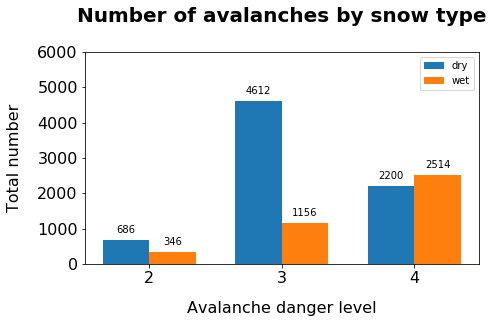

In [31]:
# General variable plotting
Title_size = {'fontsize': 20, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 16}
OffsetAxes = 15
OffsetTitle = 30
FigWidth = 8
FigHeigth = 5
plt.style.use('..\..\..\.matplotlib\stylelib\scientific.mplstyle')
        
# Define the variables for that plot
V1='dry'
V2='wet'

V1_2=df_Level.xs(2).Num_dry.sum()
V1_3=df_Level.xs(3).Num_dry.sum()
V1_4=df_Level.xs(4).Num_dry.sum()

V2_2=df_Level.xs(2).Num_wet.sum()
V2_3=df_Level.xs(3).Num_wet.sum()
V2_4=df_Level.xs(4).Num_wet.sum()

# Define the label and the x an y value
labels = ['2', '3', '4']
V1_counts = [V1_2, V1_3, V1_4]
V2_counts = [V2_2, V2_3, V2_4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, V1_counts, width, label=str(V1))
rects2 = ax.bar(x + width/2, V2_counts, width, label=str(V2))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Total number', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylim(top= 6000)
ax.set_title('Number of avalanches by snow type',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.set_figwidth(FigWidth)
fig.set_figheight(FigHeigth)

### Number of avalanche per snow type (MIXED-UNKNOWN)

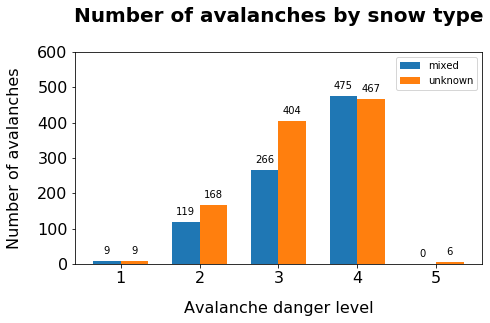

In [32]:
# Define the variables for that plot
V1='mixed'
V2='unknown'

V1_1=df_Level.xs(1).Num_mixed.sum()
V1_2=df_Level.xs(2).Num_mixed.sum()
V1_3=df_Level.xs(3).Num_mixed.sum()
V1_4=df_Level.xs(4).Num_mixed.sum()
V1_5=df_Level.xs(5).Num_mixed.sum()

V2_1=df_Level.xs(1).Num_unknown.sum()
V2_2=df_Level.xs(2).Num_unknown.sum()
V2_3=df_Level.xs(3).Num_unknown.sum()
V2_4=df_Level.xs(4).Num_unknown.sum()
V2_5=df_Level.xs(5).Num_unknown.sum()

# Define the label and the x an y value
labels = ['1', '2', '3', '4', '5']
V1_counts = [V1_1, V1_2, V1_3, V1_4, V1_5]
V2_counts = [V2_1, V2_2, V2_3, V2_4, V2_5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, V1_counts, width, label=str(V1))
rects2 = ax.bar(x + width/2, V2_counts, width, label=str(V2))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number of avalanches', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylim(top= 600)
ax.set_title('Number of avalanches by snow type',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.set_figwidth(FigWidth)
fig.set_figheight(FigHeigth)